In [59]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from get_labeled_dfs import *
from process_text import *

Using TensorFlow backend.


In [2]:
# getting data
corpus_df, val_corpus_df, emotion_df, val_emotion_df, valence_df, val_valence_df = get_labeled_dfs()


In [3]:
# using custom class method to process data
processor = Process_Text_Data()
processor.transform(corpus_df)


In [4]:
corpus_df.head()


,text
0,test predict breast cancer relapse approve
1,two hussein ally hang iraqi official say
2,sight sound ces
3,schuey see ferrari unveil new car
4,closing cancellation top advice flu outbreak


# Exploratory Data Analysis

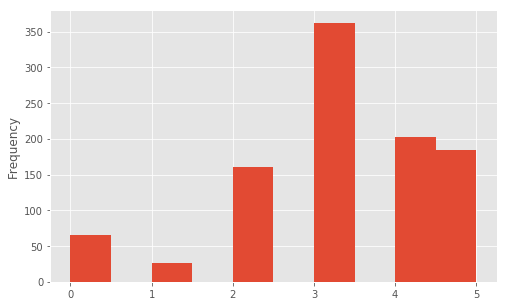

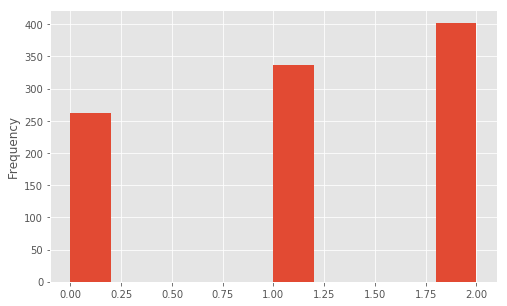

In [23]:
# distribution of classes
plt.figure(figsize=(8,5))
emotion_df['label'].plot(kind='hist')
plt.figure(figsize=(8,5))
valence_df['label'].plot(kind='hist')
plt.show()

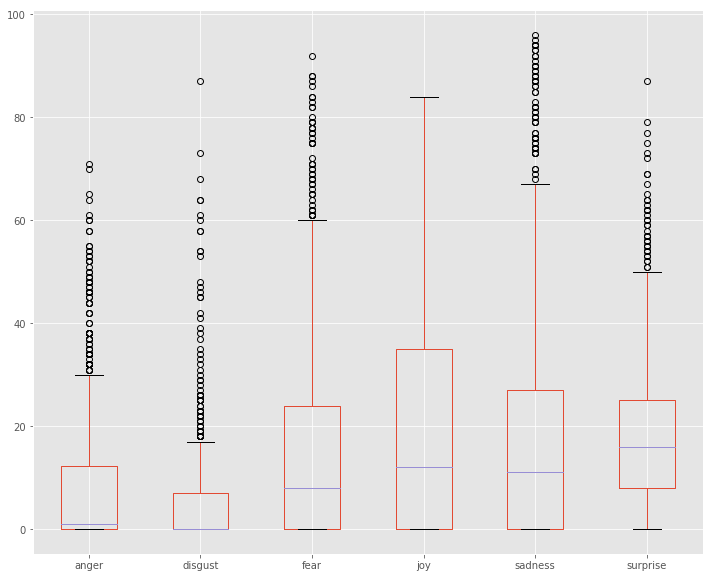

In [44]:
# boxplot showing the disribution of scores for each emotion category
plt.figure(figsize=(12,10))
emotion_df.iloc[:,:-1].boxplot()

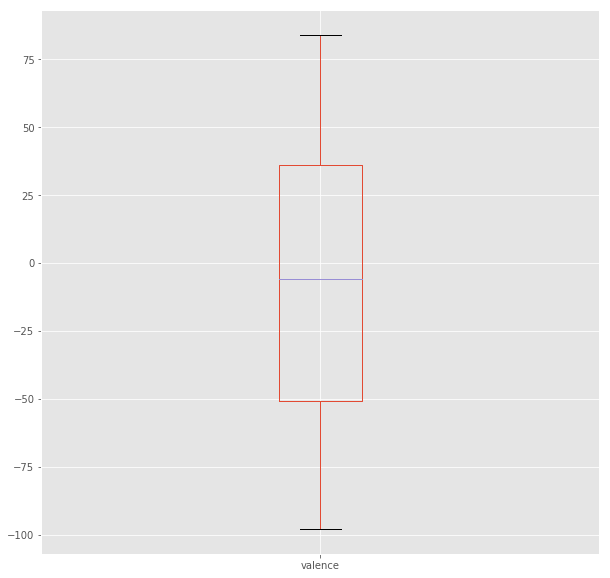

In [43]:
# boxplot showing the disribution of valencescores 
plt.figure(figsize=(10,10))
valence_df['valence'].plot(kind='box')

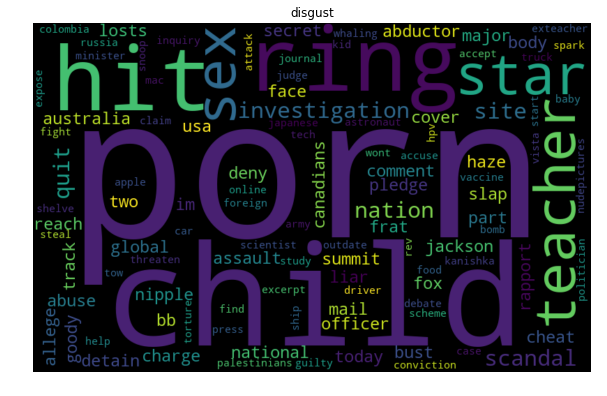

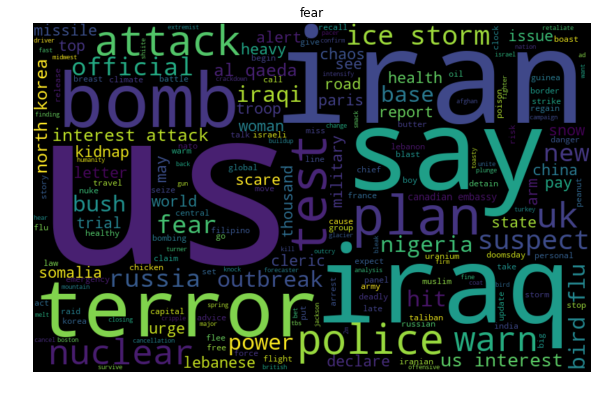

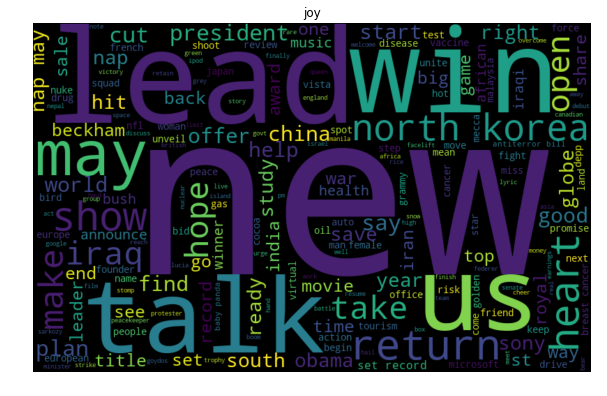

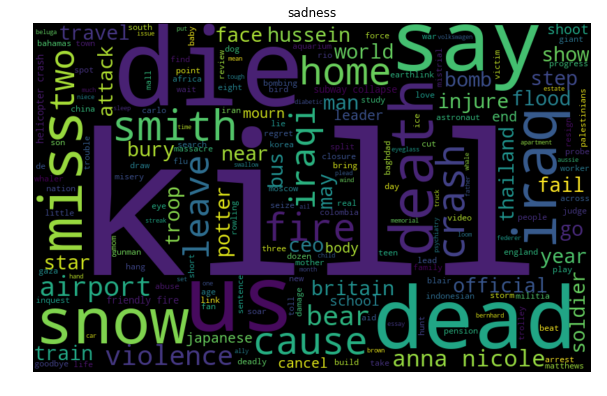

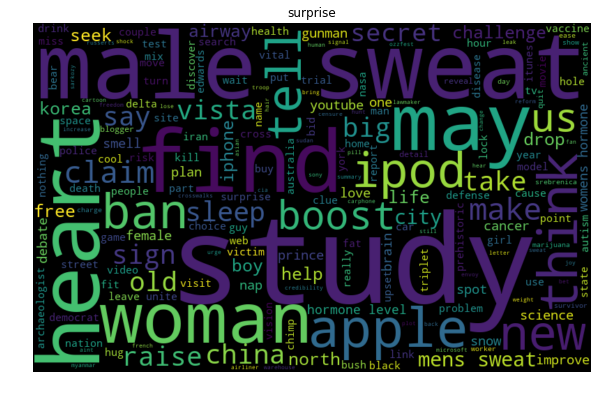

In [5]:
for i in list(emotion_df.columns[1:-2]):
    
    indexes = []
    for index, val in enumerate(emotion_df['max']):
        if val==i:
            indexes.append(index)
    
    single_emotion = corpus_df['text'][indexes] 
    word_string =' '.join([i for i in single_emotion])

    wordcloud = WordCloud(width=800, height=500, random_state=42).generate(word_string)
    plt.figure(figsize=(10, 7))
    plt.title(i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    

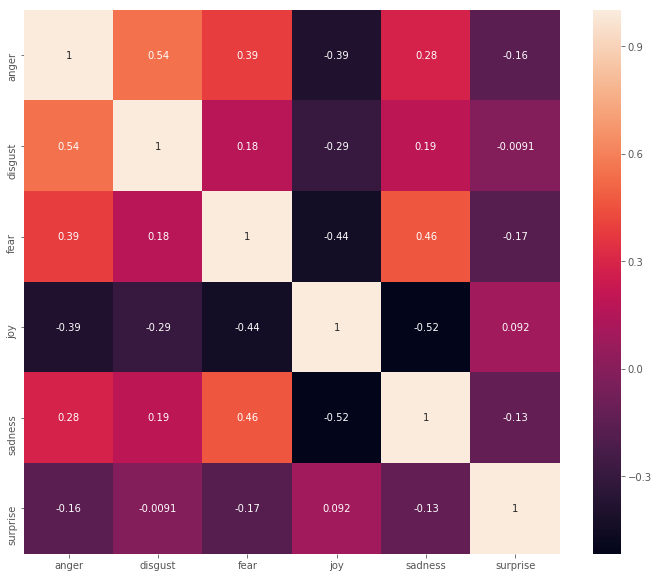

In [51]:
# correlations among emotion categories
plt.figure(figsize=(12,10))
corr = emotion_df.iloc[:,:-1].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

# Testing some models: Valence 

In [77]:
X = corpus_df['text']
y = valence_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [78]:
vectorizer = TfidfVectorizer()
tf_idf_X_train = vectorizer.fit_transform(X_train)
tf_idf_X_test = vectorizer.transform(X_test)
tf_idf_X_train.shape

(750, 1987)

In [79]:
smt = SMOTE(sampling_strategy='not majority')
X_res, y_res = smt.fit_resample(tf_idf_X_train, y_train)

# ru = RandomUnderSampler(sampling_strategy='not minority')
# X_res, y_res = ru.fit_resample(tf_idf_X_train, y_train)
X_res.shape

(903, 1987)

In [90]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
lr_classifier = LogisticRegression(C=1e10)

nb_classifier.fit(X_res, y_res)
nb_train_preds = nb_classifier.predict(X_res)
nb_test_preds = nb_classifier.predict(tf_idf_X_test)

rf_classifier.fit(X_res, y_res)
rf_train_preds = rf_classifier.predict(X_res)
rf_test_preds = rf_classifier.predict(tf_idf_X_test)

knn_classifier.fit(X_res, y_res)
knn_train_preds = knn_classifier.predict(X_res)
knn_test_preds = knn_classifier.predict(tf_idf_X_test)

lr_classifier.fit(X_res, y_res)
lr_train_preds = lr_classifier.predict(X_res)
lr_test_preds = lr_classifier.predict(tf_idf_X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [91]:
nb_train_acc = accuracy_score(y_res, nb_train_preds)
nb_test_acc = accuracy_score(y_test, nb_test_preds)
nb_train_f1 = f1_score(y_res, nb_train_preds, average='weighted')
nb_test_f1 = f1_score(y_test, nb_test_preds, average='weighted')
rf_train_acc = accuracy_score(y_res, rf_train_preds)
rf_test_acc = accuracy_score(y_test, rf_test_preds)
rf_train_f1 = f1_score(y_res, rf_train_preds, average='weighted')
rf_test_f1 = f1_score(y_test, rf_test_preds, average='weighted')
knn_train_acc = accuracy_score(y_res, knn_train_preds)
knn_test_acc = accuracy_score(y_test, knn_test_preds)
knn_train_f1 = f1_score(y_res, knn_train_preds, average='weighted')
knn_test_f1 = f1_score(y_test, knn_test_preds, average='weighted')
lr_train_acc = accuracy_score(y_res, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_test_preds)
lr_train_f1 = f1_score(y_res, lr_train_preds, average='weighted')
lr_test_f1 = f1_score(y_test, lr_test_preds, average='weighted')

print("Multinomial Naive Bayes")
print("Training Accuracy:", nb_train_acc)
print("Training F1:", nb_train_f1)
print("Testing Accuracy:", nb_test_acc)
print("Testing F1:", nb_test_f1)
print("\n")
print('Random Forest')
print("Training Accuracy:", rf_train_acc)
print("Training F1:", nb_train_f1)
print("Testing Accuracy:", rf_test_acc)
print("Testing F1:", rf_test_f1)
print("\n")
print('K Nearest Neighbors')
print("Training Accuracy:", knn_train_acc)
print("Training F1:", knn_train_f1)
print("Testing Accuracy:", knn_test_acc)
print("Testing F1:", knn_test_f1)
print("\n")
print('Logistic Regression')
print("Training Accuracy:", lr_train_acc)
print("Training F1:", lr_train_f1)
print("Testing Accuracy:", lr_test_acc)
print("Testing F1:", lr_test_f1)

Multinomial Naive Bayes
Training Accuracy: 0.9678848283499446
Training F1: 0.9679248781040622
Testing Accuracy: 0.516
Testing F1: 0.5181692927917436


Random Forest
Training Accuracy: 0.9778516057585825
Training F1: 0.9679248781040622
Testing Accuracy: 0.476
Testing F1: 0.42940308517773307


K Nearest Neighbors
Training Accuracy: 0.5669988925802879
Training F1: 0.52972266512441
Testing Accuracy: 0.384
Testing F1: 0.3717321161515454


Logistic Regression
Training Accuracy: 0.9988925802879292
Training F1: 0.9988925772321605
Testing Accuracy: 0.516
Testing F1: 0.5041309334972058
